<a href="https://colab.research.google.com/github/DeepInsider/playground-data/blob/master/docs/articles/tf2_keras_howtowrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 Digital Advantage - Deep Insider.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 連載『TensorFlow 2.0＋Keras（ tf.keras）入門』のノートブック（2）

# <table valign="middle">
  <td>
    <a target="_blank" href="https://www.atmarkit.co.jp/ait/subtop/features/di/tf2keras_index.html"> <img src="https://re.deepinsider.jp/img/ml-logo/manabu.svg"/>Deep Insiderで記事を読む</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/DeepInsider/playground-data/blob/master/docs/articles/tf2_keras_dnn.ipynb"> <img src="https://re.deepinsider.jp/img/ml-logo/gcolab.svg" />Google Colabで実行する</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/DeepInsider/playground-data/blob/master/docs/articles/tf2_keras_dnn.ipynb"> <img src="https://re.deepinsider.jp/img/ml-logo/github.svg" />GitHubでソースコードを見る</a>
  </td>
</table>

※上から順に実行してください。上のコードで実行したものを再利用しているところがあるため、すべて実行しないとエラーになるコードがあります。  
　すべてのコードを一括実行したい場合は、メニューバーから［ランタイム］－［すべてのセルを実行］をクリックしてください（※TensofFlowのバージョン2.xでない場合、エラーになります）。

※「Python 3」を利用してください。  
　Python 3を利用するには、メニューバーから［ランタイム］－［ランタイムのタイプを変更］を選択すると表示される［ノートブックの設定］ダイアログの、［ランタイムのタイプ］欄で「Python 3」に選択し、その右下にある［保存］ボタンをクリックしてください。

# 第4回　知ってる？！ TensorFlow 2.0最新の書き方入門（初中級者向け）

## ■TensorFlowにおける、3種類／6通りのモデルの書き方

TensorFlow 2.0のモデルの書き方には下記の6通りある。本稿ではこの書き方を説明する。

**【Sequentialモデル】**（今回）
- （1）`tf.keras.models.Sequential`クラスの**コンストラクター利用**： コンパクトで簡単な書き方。**ニューラルネットワークを学びたい初心者には最もお勧め**できる。例：[連載第2回](https://www.atmarkit.co.jp/ait/articles/1910/17/news026.html)
- （2）`tf.keras.models.Sequential`オブジェクトの`add`**メソッドで追加**： シンプルだが、より柔軟性のある書き方。初心者向き。上記のコントラクターでは対応できない場合に使用

**【Functional API】**（今回）
- （3）`tf.keras.Model`クラスの**コンストラクター利用**： 柔軟に記述できるが、コード量は増える。次のサブクラス化の方がコードが見やすい。**初中級者向き。柔軟性を高めつつ、再利用性も確保したい時に使用

**【Subclassingモデル】**（次回）
- （4）`tf.keras.Model`クラスの**サブクラス化**： 数学ライブラリ「NumPy」を使って記述するような感覚で記述できる方法で、柔軟性や拡張性に優れる。ライブラリ「PyTorch」にかなり近い記述が可能なので、**両方のライブラリを使いこなした人や、TensorFlowを日常的に使いこなしたい初中級者以上には最もお勧め**できる。次回、重点的に解説する
- （5）`TensorFlow低水準API`で**カスタム実装**： 上記のサブクラス化のレイヤーや活性化関数／損失関数／評価関数などを独自のコードで書く方法。**Kerasの基本機能だけでは足りない上級者向け**

**【作成済みEstimators】**（次回）
- （6）`tf.estimator.Estimator`が提供する**作成済みモデル**（**Pre-made Estimators**）の利用： 目的ごとに用意さｒた`DNNRegressor`（回帰）／`DNNClassifier`（分類）クラスなどを使ってモデルを定義できるが、融通が利かないのに、コードが長くなる場合がある。互換性のために残されている（＝将来的に廃止される可能性も高い）ので非推奨

### ●今回と次回について


- 「第4回　知ってる？！ TensorFlow 2.0最新の書き方入門（初中級者向け）」（今回）
- 「第5回　お勧めの、TensorFlow 2.0最新の書き方入門（エキスパート向け）」（次回）

### ●TensorFlowのエコシステム／機能構成図


![TensorFlow全体の機能構成図](https://github.com/DeepInsider/playground-data/raw/master/docs/articles/tensorflow-ecosystem-2.0.png)

## ■コードの書き方を実行するための準備

### ●前提条件

### 【チェック】Pythonバージョン（※3系を使うこと）
Colabにインストール済みのものを使う。もし2系になっている場合は、メニューバーの［ランタイム］－［ランタイムのタイプを変更］をクリックして切り替えてほしい。

In [0]:
import sys
print('Python', sys.version)
# Python 3.6.9 (default, Nov  7 2019, 10:44:02)  …… などと表示される

Python 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


### 【チェック】TensorFlowバージョン（※2系を使うこと）
基本的にはColabにインストール済みのものを使う。もし2系になっている場合は、リスト4-0を実行してバージョン2.0を使う。

In [0]:
import tensorflow as tf
print('TensorFlow', tf.__version__)
# TensorFlow 1.15.0 ……などと表示される

TensorFlow 2.1.0


### リスト0-1　［オプション］ライブラリ「TensorFlow」最新バージョンのインストール

※Google Colabでを使う場合は、「%tensorflow_version 2.x」というマジックコマンドを使用してください。  
　「TensorFlow 2.x selected.」と表示されればOKです。
　「TensorFlow is already loaded. Please restart the runtime to change versions.」と表示される場合は、メニューバーから［ランタイム］－［ランタイムを再起動］を実行した上で、再度マジックコマンドの実行結果を確かめてください。

In [0]:
# Google Colabで最新の2.xを使う場合（Colab専用）
%tensorflow_version 2.x

# 最新バージョンにアップグレードする場合
!pip install --upgrade tensorflow

# バージョンを明示してアップグレードする場合
#!pip install --upgrade tensorflow===2.1.0

# 最新バージョンをインストールする場合
#!pip install tensorflow

# バージョンを明示してインストールする場合
#!pip install tensorflow===2.1.0

Requirement already up-to-date: tensorflow in /tensorflow-2.1.0/python3.6 (2.1.0)


### ［オプション］【チェック】TensorFlowバージョン（※インストール後の確認）
バージョン2.xになっているか再度チェックする。

In [0]:
import tensorflow as tf
print('TensorFlow', tf.__version__)
# TensorFlow 2.1.0 ……などと表示される

TensorFlow 2.1.0


### ●データについて

「[第1回　初めてのニューラルネットワーク実装、まずは準備をしよう ― 仕組み理解×初実装（前編）：TensorFlow 2＋Keras（tf.keras）入門 - ＠IT](https://www.atmarkit.co.jp/ait/articles/1909/19/news026.html)」の記事と同じように、シンプルな座標点データを生成して使う。使い方は、前述の記事を参照してほしい。

なお、座標点データは、「[ニューラルネットワーク Playground - Deep Insider](https://deepinsider.github.io/playground/)」（以下、Playground）と同じ生成仕様となっている。

### リスト0-x　座標点データの生成

In [0]:
# 座標点データを生成するライブラリのインストール
!pip install playground-data

In [0]:
# playground-dataライブラリのplygdataパッケージを「pg」という別名でインポート
import plygdata as pg

# 設定値を定数として定義
PROBLEM_DATA_TYPE = pg.DatasetType.ClassifyCircleData # 問題種別：「分類（Classification）」、データ種別：「円（CircleData）」を選択
TRAINING_DATA_RATIO = 0.5  # データの何％を訓練【Training】用に？ (残りは精度検証【Validation】用) ： 50％
DATA_NOISE = 0.0           # ノイズ： 0％

# 定義済みの定数を引数に指定して、データを生成する
data_list = pg.generate_data(PROBLEM_DATA_TYPE, DATA_NOISE)

# データを「訓練用」と「精度検証用」を指定の比率で分割し、さらにそれぞれを「データ（X）」と「教師ラベル（y）」に分ける
X_train, y_train, X_valid, y_valid = pg.split_data(data_list, training_size=TRAINING_DATA_RATIO)

# データ分割後の各変数の内容例として、それぞれ5件ずつ出力（※出力内容は実行ごとに異なる）
print('X_train:'); print(X_train[:5]) # [[-0.07940614  1.15175421], ……]
print('y_train:'); print(y_train[:5]) # [[ 1.], ……  [-1.]]
print('X_valid:'); print(X_valid[:5]) # [[ 0.10066901  1.19950826], ……]
print('y_valid:'); print(y_valid[:5]) # [[ 1.], ……  [-1.]]

X_train:
[[ 4.44518246  1.496433  ]
 [-4.12770977 -2.28657882]
 [ 0.17226167 -0.13775929]
 [ 2.09356596 -3.48564878]
 [-3.06613233 -2.50005571]]
y_train:
[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]]
X_valid:
[[-0.92604211 -0.82810435]
 [ 0.36993929 -0.6415146 ]
 [ 1.05498629 -0.32952731]
 [ 1.46399102  4.104153  ]
 [-1.17816008 -4.02663891]]
y_valid:
[[ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]]


### ●ディープニューラルネットワークのモデル設計
- 入力の数（`INPUT_FEATURES`）は、$X_1$と$X_2$で**2つ**
- 隠れ層のレイヤー数は、**2つ**
  - 隠れ層にある1つ目のニューロンの数（`LAYER1_NEURONS`）は、**3つ**
  - 隠れ層にある2つ目のニューロンの数（`LAYER2_NEURONS`）は、**3つ**
- 出力層にあるニューロンの数（`OUTPUT_RESULTS`）は、**1つ**

### リスト0-2　インポートと変数の宣言（全ての書き方に共通）

In [0]:
# ライブラリ「TensorFlow」のtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf
from tensorflow.keras import layers       # 「レイヤーズ」モジュールのインポート

# 定数（モデル定義時に必要となる数値）
INPUT_FEATURES = 2  # 入力（特徴）の数： 2
LAYER1_NEURONS = 3  # ニューロンの数： 3
LAYER2_NEURONS = 3  # ニューロンの数： 3
OUTPUT_RESULTS = 1  # 出力結果の数： 1

### リスト0-3　正解率（精度）のカスタム指標（全ての書き方に共通）

In [0]:
import tensorflow.keras.backend as K

def tanh_accuracy(y_true, y_pred):           # y_trueは正解、y_predは予測（出力）
  threshold = K.cast(0.0, y_pred.dtype)              # -1か1かを分ける閾値を作成
  y_pred = K.cast(y_pred >= threshold, y_pred.dtype) # 閾値未満で0、以上で1に変換
  # 2倍して-1.0することで、0／1を-1.0／1.0にスケール変換して正解率を計算
  return K.mean(K.equal(y_true, y_pred * 2 - 1.0), axis=-1)

## ■（1）Sequentialクラスのコンストラクター利用［tf.keras - Sequential API］

### リスト1-1　Sequentialクラスのコンストラクターを利用した書き方

In [0]:
model = tf.keras.models.Sequential([    # モデルの生成

  # 隠れ層：1つ目のレイヤー
  layers.Dense(                 # 全結合層（線形変換）
      input_shape=(INPUT_FEATURES,),       # 入力の形状（＝入力層）
      name='layer1',                       # 表示用に名前付け
      kernel_initializer='random_uniform', # 重さの初期化（一様分布のランダム値）
      bias_initializer='zeros',            # バイアスの初期化（0）
      units=LAYER1_NEURONS,                # ユニットの数      
      activation='tanh'),                  # 活性化関数

  # 隠れ層：2つ目のレイヤー
  layers.Dense(                 # 全結合層（線形変換）
      name='layer2',                       # 表示用に名前付け
      kernel_initializer='random_uniform', # 重さの初期化
      bias_initializer='zeros',            # バイアスの初期化
      units=LAYER2_NEURONS,                # ユニットの数
      activation='tanh'),                  # 活性化関数

  # 出力層
  layers.Dense(                 # 全結合層（線形変換）
      name='layer_out',                    # 表示用に名前付け
      kernel_initializer='random_uniform', # 重さの初期化
      bias_initializer='zeros',            # バイアスの初期化
      units=OUTPUT_RESULTS,                # ユニットの数
      activation='tanh'),                  # 活性化関数

], name='sequential_constructor'           # モデルにも名前付け
)

# 以上でモデル設計は完了
model.summary()                         # モデルの内容を出力

Model: "sequential_constructor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer2 (Dense)               (None, 3)                 12        
_________________________________________________________________
layer_out (Dense)            (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### リスト1-2　モデル構成図を表示するコード

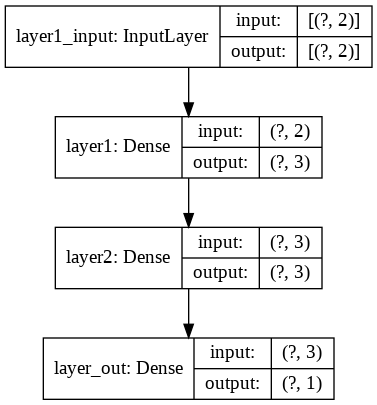

In [0]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=False, filename='model.png')

### ●重み／バイアスの初期化指定【応用】

### リスト1-3　重み／バイアスを初期化するための独自イニシャライザー

In [0]:
random_init = tf.keras.initializers.RandomUniform(
    minval=-1.0, maxval=1.0) # 下限と上限を指定した一様分布でランダム値

### ●学習と推論： 書き方入門（初中級者向け）で共通

リスト1-4　学習方法を設定、学習、推論（予測）するコード（共通）

In [0]:
# 学習方法を設定し、学習し、推論（予測）する
model.compile(tf.keras.optimizers.SGD(lr=0.03), 'mean_squared_error', [tanh_accuracy])
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=15,epochs=100, verbose=1)
model.predict([[0.1,-0.2]])

Train on 250 samples, validate on 250 samples
Epoch 1/100
250/250 [==============================] - 0s 1ms/sample - loss: 1.0005 - tanh_accuracy: 0.5120 - val_loss: 1.0028 - val_tanh_accuracy: 0.4800
Epoch 2/100
250/250 [==============================] - 0s 218us/sample - loss: 1.0001 - tanh_accuracy: 0.4960 - val_loss: 1.0078 - val_tanh_accuracy: 0.4800
Epoch 3/100
250/250 [==============================] - 0s 237us/sample - loss: 1.0014 - tanh_accuracy: 0.5200 - val_loss: 1.0043 - val_tanh_accuracy: 0.4800
Epoch 4/100
250/250 [==============================] - 0s 201us/sample - loss: 1.0007 - tanh_accuracy: 0.4840 - val_loss: 1.0098 - val_tanh_accuracy: 0.4800
Epoch 5/100
250/250 [==============================] - 0s 196us/sample - loss: 1.0007 - tanh_accuracy: 0.5200 - val_loss: 1.0068 - val_tanh_accuracy: 0.4800
Epoch 6/100
250/250 [==============================] - 0s 212us/sample - loss: 1.0029 - tanh_accuracy: 0.5080 - val_loss: 1.0076 - val_tanh_accuracy: 0.4800
Epoch 7/100
25

array([[-0.05683679]], dtype=float32)

モデルの書き方だけでなく、学習に関するコードも、下記のように2種類ある。

- **初中級者向けの書き方：** リスト1-4のように`compile()`＆`fit()`メソッドを呼び出す、簡単で手軽な書き方
- **エキスパート向けの書き方：** 次回説明するが、`tf.GradientTape`クラス（自動微分の記録機能）を使った柔軟で拡張性の高い書き方（PyTorchの書き方に近い）

### ●作成済みモデルのリセット

### リスト1-5　次に進む前にモデルをリセットするコード

In [0]:
tf.keras.backend.clear_session() # グラフを破棄する
del model                        # 変数を削除する

## ■（2）Sequentialオブジェクトのaddメソッドで追加［tf.keras - Sequential API］

### リスト2-1　Sequentialオブジェクトのaddメソッドを利用した書き方

In [0]:
model = tf.keras.models.Sequential(  # モデルの生成
    name='sequential_add_method'     # モデルにも名前付け
)

# 隠れ層：1つ目のレイヤー
model.add(layers.Dense(        # 全結合層（線形変換）
    input_shape=(INPUT_FEATURES,),   # 入力の形状（＝入力層）
    name='layer1',                   # 表示用に名前付け
    units=LAYER1_NEURONS,            # ユニットの数
    activation='tanh'))              # 活性化関数

# 隠れ層：2つ目のレイヤー
model.add(layers.Dense(        # 全結合層（線形変換）
    name='layer2',                   # 表示用に名前付け
    units=LAYER2_NEURONS,            # ユニットの数
    activation='tanh'))              # 活性化関数

# 出力層
model.add(layers.Dense(        # 全結合層（線形変換）
    name='layer_out',                # 表示用に名前付け
    units=OUTPUT_RESULTS,            # ユニットの数
    activation='tanh'))              # 活性化関数

# 以上でモデル設計は完了
model.summary()                      # モデルの内容を出力

Model: "sequential_add_method"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer2 (Dense)               (None, 3)                 12        
_________________________________________________________________
layer_out (Dense)            (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


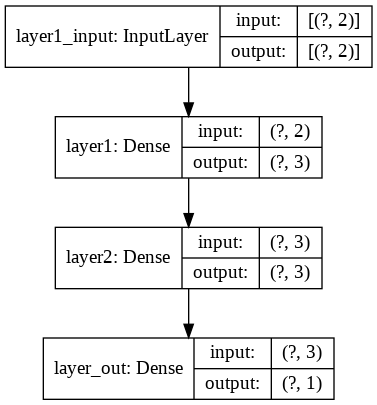

In [0]:
# モデルの構成図を表示
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=False, filename='model.png')

In [0]:
# 学習方法を設定し、学習し、推論（予測）する
model.compile(tf.keras.optimizers.SGD(lr=0.03), 'mean_squared_error', [tanh_accuracy])
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=15,epochs=100, verbose=1)
model.predict([[0.1,-0.2]])

Train on 250 samples, validate on 250 samples
Epoch 1/100
250/250 [==============================] - 0s 2ms/sample - loss: 1.0095 - tanh_accuracy: 0.4520 - val_loss: 1.0011 - val_tanh_accuracy: 0.4800
Epoch 2/100
250/250 [==============================] - 0s 238us/sample - loss: 0.9986 - tanh_accuracy: 0.4920 - val_loss: 1.0002 - val_tanh_accuracy: 0.4600
Epoch 3/100
250/250 [==============================] - 0s 249us/sample - loss: 0.9955 - tanh_accuracy: 0.4680 - val_loss: 0.9965 - val_tanh_accuracy: 0.4520
Epoch 4/100
250/250 [==============================] - 0s 229us/sample - loss: 0.9872 - tanh_accuracy: 0.5120 - val_loss: 0.9891 - val_tanh_accuracy: 0.4720
Epoch 5/100
250/250 [==============================] - 0s 234us/sample - loss: 0.9823 - tanh_accuracy: 0.5160 - val_loss: 0.9843 - val_tanh_accuracy: 0.4840
Epoch 6/100
250/250 [==============================] - 0s 247us/sample - loss: 0.9729 - tanh_accuracy: 0.5200 - val_loss: 0.9735 - val_tanh_accuracy: 0.5360
Epoch 7/100
25

array([[0.9911068]], dtype=float32)

In [0]:
# 次に進む前にモデルをリセット
tf.keras.backend.clear_session() # グラフを破棄する
del model                        # 変数を削除する

## ■（3）Modelクラスのコンストラクター利用［tf-keras - Functional API］

### リスト3-1　Modelクラスのコンストラクターを利用した書き方

In [0]:
# ### 活性化を変数（ハイパーパラメーター）として定義 ###
# 変数（モデル定義時に必要となる数値）
        # 慣例では入力も出力も「x」と同じ変数名で記述する（よって以下では「x」と書く）
activation1 = layers.Activation('tanh' # 活性化関数（隠れ層用）： tanh関数（変更可能）
    , name='activation1'               # 活性化関数にも名前付け
    )
activation2 = layers.Activation('tanh' # 活性化関数（隠れ層用）： tanh関数（変更可能）
    , name='activation2'               # 活性化関数にも名前付け
    )
acti_out = layers.Activation('tanh'    # 活性化関数（出力層用）： tanh関数（固定）
    , name='acti_out'                  # 活性化関数にも名前付け
    )

# ### レイヤーを定義 ###
# input_shape引数の代わりに、Inputクラスを使うことも可能
inputs = layers.Input(          # 入力層
    name='layer_in',                 # 表示用に名前付け
    shape=(INPUT_FEATURES,))         # 入力の形状

# 隠れ層：1つ目のレイヤー
layer1 = layers.Dense(          # 全結合層（線形変換）
    #input_shape=(INPUT_FEATURES,),  # ※入力層は定義済みなので不要
    name='layer1',                   # 表示用に名前付け
    units=LAYER1_NEURONS)            # ユニットの数

# 隠れ層：2つ目のレイヤー
layer2 = layers.Dense(          # 全結合層（線形変換）
    name='layer2',                   # 表示用に名前付け
    units=LAYER2_NEURONS)            # ユニットの数

# 出力層
layer_out = layers.Dense(       # 全結合層（線形変換）
    name='layer_out',                # 表示用に名前付け
    units=OUTPUT_RESULTS)            # ユニットの数

# ### フィードフォワードを定義 ###
# 「出力＝活性化関数（第n層（入力））」の形式で記述
x1 = activation1(layer1(inputs))     # 活性化関数は変数として定義
x2 = activation2(layer2(x1))         # 同上
outputs = acti_out(layer_out(x2))    # ※活性化関数は「tanh」固定

# ### モデルの生成 ###
model = tf.keras.Model(inputs=inputs, outputs=outputs
    , name='model_constructor'       # モデルにも名前付け
)

# ### 以上でモデル設計は完了 ###
model.summary()                      # モデルの内容を出力

Model: "model_constructor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_in (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 3)                 9         
_________________________________________________________________
activation1 (Activation)     (None, 3)                 0         
_________________________________________________________________
layer2 (Dense)               (None, 3)                 12        
_________________________________________________________________
activation2 (Activation)     (None, 3)                 0         
_________________________________________________________________
layer_out (Dense)            (None, 1)                 4         
_________________________________________________________________
acti_out (Activation)        (None, 1)           

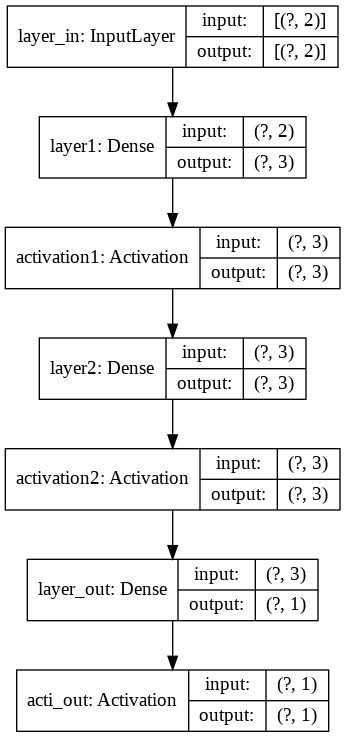

In [0]:
# モデルの構成図を表示
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=False, filename='model.png')

In [0]:
# 学習方法を設定し、学習し、推論（予測）する
model.compile(tf.keras.optimizers.SGD(lr=0.03), 'mean_squared_error', [tanh_accuracy])
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=15,epochs=100, verbose=1)
model.predict([[0.1,-0.2]])

Train on 250 samples, validate on 250 samples
Epoch 1/100
250/250 [==============================] - 0s 2ms/sample - loss: 1.0755 - tanh_accuracy: 0.5680 - val_loss: 0.9802 - val_tanh_accuracy: 0.6200
Epoch 2/100
250/250 [==============================] - 0s 237us/sample - loss: 0.9611 - tanh_accuracy: 0.6320 - val_loss: 0.9292 - val_tanh_accuracy: 0.6640
Epoch 3/100
250/250 [==============================] - 0s 282us/sample - loss: 0.9011 - tanh_accuracy: 0.6720 - val_loss: 0.8556 - val_tanh_accuracy: 0.7200
Epoch 4/100
250/250 [==============================] - 0s 256us/sample - loss: 0.8412 - tanh_accuracy: 0.7360 - val_loss: 0.7921 - val_tanh_accuracy: 0.7240
Epoch 5/100
250/250 [==============================] - 0s 252us/sample - loss: 0.7752 - tanh_accuracy: 0.7880 - val_loss: 0.7424 - val_tanh_accuracy: 0.7800
Epoch 6/100
250/250 [==============================] - 0s 264us/sample - loss: 0.6975 - tanh_accuracy: 0.8200 - val_loss: 0.6747 - val_tanh_accuracy: 0.8120
Epoch 7/100
25

array([[0.98861]], dtype=float32)

In [0]:
# 次に進む前にモデルをリセット
tf.keras.backend.clear_session() # グラフを破棄する
del model                        # 変数を削除する

# (つづく)
